# WeatherPy
----

#### Note
* Instructions have been included for each segment. You do not have to follow them exactly, but they are included to help you think through the steps.

In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from scipy.stats import linregress

# Import API key
from api_keys import weather_api_key

# Incorporated citipy to determine city based on latitude and longitude
from citipy import citipy

# Output File (CSV)
output_data_file = "output_data/cities.csv"

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

## Generate Cities List

In [2]:
# List for holding lat_lngs and cities
lat_lngs = []
cities = []

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
len(cities)

613

### Perform API Calls
* Perform a weather check on each city using a series of successive API calls.
* Include a print log of each city as it'sbeing processed (with the city number and city name).


In [3]:
url = "http://api.openweathermap.org/data/2.5/weather?"
units = "metric"
# query URL
inquiry_url = url + "appid=" + weather_api_key + "&units=" + units + "&q="

In [4]:
weather_data = {"City":[],"Cloudiness":[],"Country":[],"Date":[],"Humidity":[],"Lat":[],"Lng":[],"Max Temp":[],"Wind Speed": []}
set = 1
record = 1

print("Beginning Data Retrival")
print("------------------------------")

for city in cities:
    weather_response = requests.get(inquiry_url + city)
    weather_response_json = weather_response.json()
    
    if weather_response.status_code == 200:
        weather_data["City"].append(city)
        weather_data["Cloudiness"].append(weather_response_json['clouds']['all'])
        weather_data["Country"].append(weather_response_json['sys']['country'])
        weather_data["Date"].append(weather_response_json['dt'])
        weather_data["Humidity"].append(weather_response_json['main']['humidity'])
        weather_data["Lat"].append(weather_response_json['coord']['lat'])
        weather_data["Lng"].append(weather_response_json['coord']['lon'])
        weather_data["Max Temp"].append(weather_response_json['main']['temp_max'])
        weather_data["Wind Speed"].append(weather_response_json['wind']['speed'])
        if record <= 50:
            print(f"Processing Record {record} of Set {set} | {city}")
            record += 1 
        else:
            record = 0
            set += 1
            print(f"Processing Record {record} of Set {set} | {city}")
            record += 1
    else:
        print("City not found. Skipping...")
print("-------------------------")
print("Data Retrieval Complete")
print("-------------------------")

Beginning Data Retrival
------------------------------
Processing Record 1 of Set 1 | saint-philippe
Processing Record 2 of Set 1 | busselton
Processing Record 3 of Set 1 | podgornoye
Processing Record 4 of Set 1 | castro
Processing Record 5 of Set 1 | djambala
Processing Record 6 of Set 1 | carnarvon
Processing Record 7 of Set 1 | saint-pierre
Processing Record 8 of Set 1 | geraldton
Processing Record 9 of Set 1 | baruun-urt
Processing Record 10 of Set 1 | longkou
Processing Record 11 of Set 1 | pevek
Processing Record 12 of Set 1 | hithadhoo
Processing Record 13 of Set 1 | zyryanka
Processing Record 14 of Set 1 | nome
Processing Record 15 of Set 1 | rikitea
Processing Record 16 of Set 1 | provideniya
Processing Record 17 of Set 1 | airai
Processing Record 18 of Set 1 | skierniewice
Processing Record 19 of Set 1 | bluff
Processing Record 20 of Set 1 | cherskiy
Processing Record 21 of Set 1 | saint-georges
Processing Record 22 of Set 1 | rocha
Processing Record 23 of Set 1 | san cristo

### Convert Raw Data to DataFrame
* Export the city data into a .csv.
* Display the DataFrame

In [5]:
weather_df = pd.DataFrame(weather_data)
weather_df.head()

,City,Cloudiness,Country,Date,Humidity,Lat,Lng,Max Temp,Wind Speed
0,saint-philippe,37,RE,1594961669,93,-21.36,55.77,20.00,7.20
1,busselton,38,AU,1594961670,58,-33.65,115.33,13.89,7.92
2,podgornoye,27,RU,1594961670,59,51.73,39.15,18.00,2.00
3,castro,44,BR,1594961469,86,-24.79,-50.01,13.89,2.53
4,djambala,99,CG,1594961672,90,-2.54,14.75,19.16,1.93


In [6]:
weather_df.to_csv('weather_data.csv', encoding='utf-8', index=False)

## Plotting the Data
* Use proper labeling of the plots using plot titles (including date of analysis) and axes labels.
* Save the plotted figures as .pngs.

## Latitude vs. Temperature Plot

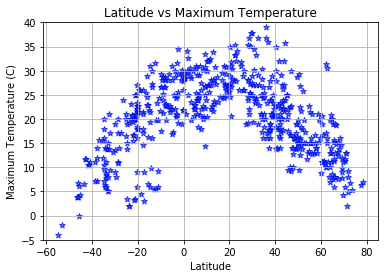

In [7]:
plt.scatter(weather_df["Lat"],weather_df["Max Temp"], marker='*', alpha=0.75, edgecolor='blue')

plt.title("Latitude vs Maximum Temperature")
plt.xlabel("Latitude")
plt.ylabel("Maximum Temperature (C)")
plt.ylim(-5,40)
plt.grid(True)

plt.savefig("Latitude_temp.png")

The Latitude vs. Temperature plots in a bell shape. The bell curves rises to show the highest averages temperatures between latitudes of 0-40 and the lowest maximum temperaturues at latitudes lower than -40 and above 60.

## Latitude vs. Humidity Plot

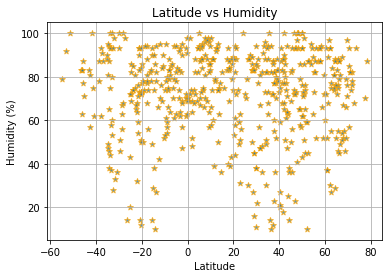

In [8]:
plt.scatter(weather_df["Lat"],weather_df["Humidity"], marker='*', alpha=0.75, edgecolor='orange')

plt.title("Latitude vs Humidity")
plt.xlabel("Latitude")
plt.ylabel("Humidity (%)")
plt.ylim(5,105)
plt.grid(True)

plt.savefig("Latitude_humidity.png")

The Latitude vs. Humidity plot is distributed randomly. The data appears to make the most noise between 60-100 percent humidity, however, there is no correlation between latitude and percent humidity.

## Latitude vs. Cloudiness Plot

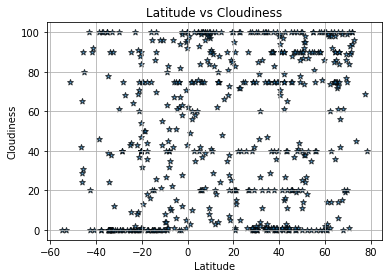

In [9]:
plt.scatter(weather_df["Lat"],weather_df["Cloudiness"], marker='*', alpha=0.75, edgecolor='black')

plt.title("Latitude vs Cloudiness")
plt.xlabel("Latitude")
plt.ylabel("Cloudiness")
plt.ylim(-5,105)
plt.grid(True)

plt.savefig("Latitude_cloudiness.png")

No trend can be observed from the Latitude vs. Cloudiness plot. The data points are at random. This could mean there is no correlation between latitudinal location and cloudiness. 

## Latitude vs. Wind Speed Plot

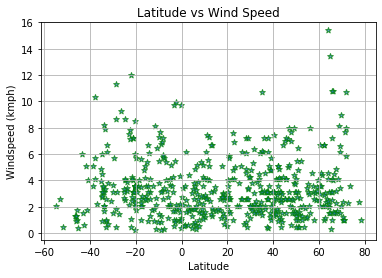

In [10]:
plt.scatter(weather_df["Lat"],weather_df["Wind Speed"], marker='*', alpha=0.75, edgecolor='green')

plt.title("Latitude vs Wind Speed")
plt.xlabel("Latitude")
plt.ylabel("Windspeed (kmph)")
plt.ylim(-.5,16)
plt.grid(True)

plt.savefig("Latitude_Windspeed.png")

The Latitude vs. Wind Speed Plot shows no correlation between lattidue and windspeed as most of the data is distributed evenly over the latitude range between windspeeds of 0-6 kmph

## Linear Regression

In [11]:
# Create Northern and Southern Hemisphere DataFrames
northern = weather_df.loc[weather_df["Lat"] >= 0.0]
northern.reset_index(inplace=True)

southern = weather_df.loc[weather_df["Lat"] < 0.0]
southern.reset_index(inplace=True)

In [12]:
northern

,index,City,Cloudiness,Country,Date,Humidity,Lat,Lng,Max Temp,Wind Speed
0,2,podgornoye,27,RU,1594961670,59,51.73,39.15,18.00,2.00
1,8,baruun-urt,100,MN,1594961675,74,46.68,113.28,16.66,7.17
2,9,longkou,83,CN,1594961676,60,37.65,120.33,27.92,0.36
3,10,pevek,99,RU,1594961677,97,69.70,170.31,4.33,2.04
4,12,zyryanka,61,RU,1594961678,46,65.75,150.85,15.21,2.51
...,...,...,...,...,...,...,...,...,...,...
361,550,palo alto,1,US,1594962155,72,37.44,-122.14,17.78,3.10
362,551,marrakesh,60,MA,1594962089,47,31.63,-8.01,27.00,1.50
363,554,alappuzha,100,IN,1594962159,82,9.49,76.33,26.80,3.57
364,555,llanes,65,ES,1594962160,94,43.42,-4.75,17.78,0.45


In [13]:
southern

,index,City,Cloudiness,Country,Date,Humidity,Lat,Lng,Max Temp,Wind Speed
0,0,saint-philippe,37,RE,1594961669,93,-21.36,55.77,20.00,7.20
1,1,busselton,38,AU,1594961670,58,-33.65,115.33,13.89,7.92
2,3,castro,44,BR,1594961469,86,-24.79,-50.01,13.89,2.53
3,4,djambala,99,CG,1594961672,90,-2.54,14.75,19.16,1.93
4,5,carnarvon,90,AU,1594961604,82,-24.87,113.63,19.00,8.70
...,...,...,...,...,...,...,...,...,...,...
188,547,samarinda,100,ID,1594962044,63,-0.50,117.15,30.17,1.64
189,552,sumbe,43,AO,1594962124,84,-11.21,13.84,19.79,2.15
190,553,iturama,13,BR,1594962157,50,-19.73,-50.20,21.38,3.44
191,557,morondava,47,MG,1594962142,50,-20.28,44.28,20.84,8.55


In [14]:
def plotLinearRegression(x,y,x_label,y_label,position,ifig):
    (slope, intercept, rvalue, pvalue, stderr) = linregress(x, y)
    regression = x * slope + intercept
    equation = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

    plt.scatter(x,y)
    plt.plot(x,regression,"r-")
    plt.annotate(equation,position,fontsize=15,color="red")
    plt.xlabel(x_label)
    plt.ylabel(y_label)

    plt.show()

####  Northern Hemisphere - Max Temp vs. Latitude Linear Regression

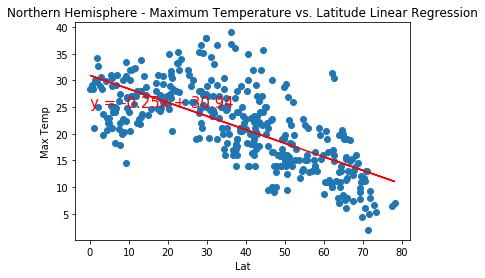

<Figure size 432x288 with 0 Axes>

In [15]:
x_label = "Lat"
y_label = "Max Temp"
plt.title("Northern Hemisphere - Maximum Temperature vs. Latitude Linear Regression")
position = (0,25)
plotLinearRegression(northern[x_label],northern[y_label],x_label,y_label,position,5)
plt.savefig("northerntemplat.png")

####  Southern Hemisphere - Max Temp vs. Latitude Linear Regression

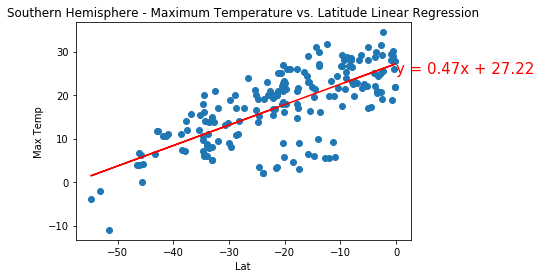

<Figure size 432x288 with 0 Axes>

In [16]:
x_label = "Lat"
y_label = "Max Temp"
plt.title("Southern Hemisphere - Maximum Temperature vs. Latitude Linear Regression")
position = (0,25)
plotLinearRegression(southern[x_label],southern[y_label],x_label,y_label,position,5)
plt.savefig("southerntemplat.png")

####  Northern Hemisphere - Humidity (%) vs. Latitude Linear Regression

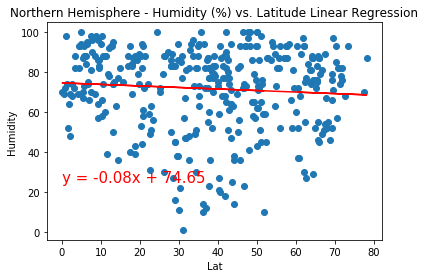

<Figure size 432x288 with 0 Axes>

In [17]:
x_label = "Lat"
y_label = "Humidity"
plt.title("Northern Hemisphere - Humidity (%) vs. Latitude Linear Regression")
position = (0,25)
plotLinearRegression(northern[x_label],northern[y_label],x_label,y_label,position,5)
plt.savefig("northernhumidlat.png")

####  Southern Hemisphere - Humidity (%) vs. Latitude Linear Regression

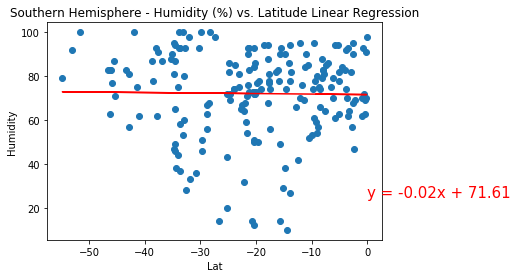

<Figure size 432x288 with 0 Axes>

In [18]:
x_label = "Lat"
y_label = "Humidity"
plt.title("Southern Hemisphere - Humidity (%) vs. Latitude Linear Regression")
position = (0,25)
plotLinearRegression(southern[x_label],southern[y_label],x_label,y_label,position,5)
plt.savefig("southernhumidlat.png")

####  Northern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

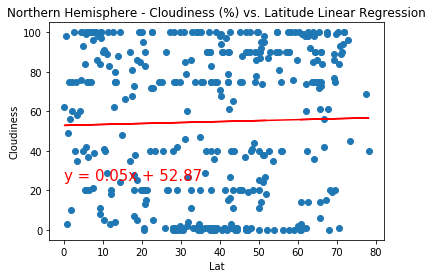

<Figure size 432x288 with 0 Axes>

In [19]:
x_label = "Lat"
y_label = "Cloudiness"
plt.title("Northern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression")
position = (0,25)
plotLinearRegression(northern[x_label],northern[y_label],x_label,y_label,position,5)
plt.savefig("northerncloudlat.png")

####  Southern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

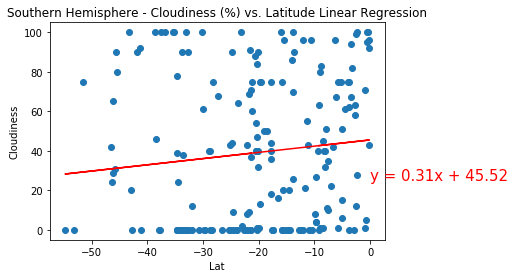

<Figure size 432x288 with 0 Axes>

In [20]:
x_label = "Lat"
y_label = "Cloudiness"
plt.title("Southern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression")
position = (0,25)
plotLinearRegression(southern[x_label],southern[y_label],x_label,y_label,position,5)
plt.savefig("southerncloudlat.png")

####  Northern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

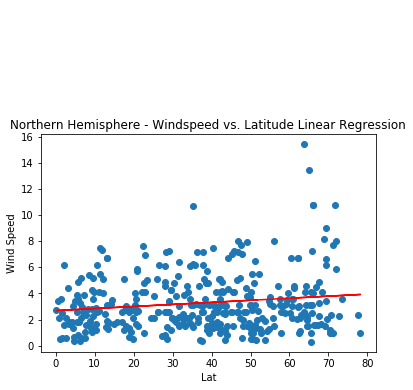

<Figure size 432x288 with 0 Axes>

In [21]:
x_label = "Lat"
y_label = "Wind Speed"
plt.title("Northern Hemisphere - Windspeed vs. Latitude Linear Regression")
position = (0,25)
plotLinearRegression(northern[x_label],northern[y_label],x_label,y_label,position,5)
plt.savefig("northernwindlat.png")

####  Southern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

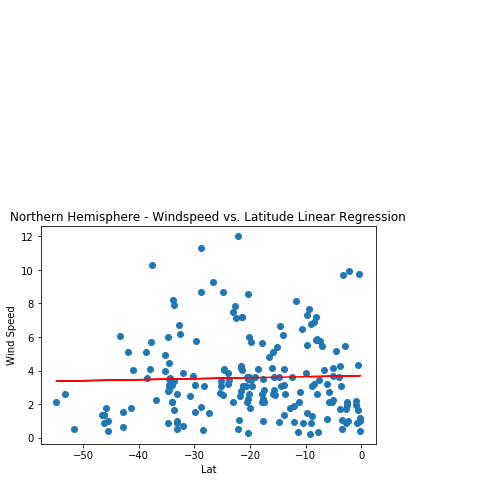

<Figure size 432x288 with 0 Axes>

In [22]:
x_label = "Lat"
y_label = "Wind Speed"
plt.title("Northern Hemisphere - Windspeed vs. Latitude Linear Regression")
position = (0,25)
plotLinearRegression(southern[x_label],southern[y_label],x_label,y_label,position,5)
plt.savefig("southernwindlat.png")